# India Weather Analysis 2010-2024


## Dataset

India 5000 cities weather https://www.kaggle.com/datasets/mukeshdevrath007/indian-5000-cities-weather-data/data

Only use one of the 5000+ csv files - Hatta.csv


Time series data analysis methods: 

- Statistical models, including MA (moving average model), ARMA (autoregression moving average model), etc.

- Machine learning methods, including RNN, LSTM, maybe CNN, maybe Bigram. 

In [1]:
!pip install pandasql
!pip install seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/6b/c4/ee4096ffa2eeeca0c749b26f0371bd26aa5c8b611c43de99a4f86d3de0a7/pandasql-0.7.3.tar.gz (26 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/86/5b/48378d9e8306f97e824cb2b0c0842cd1702ab67380dd546d720d33aca815/SQLAlchemy-2.0.32-cp38-cp38-win_amd64.whl (2.1 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/1c/fa/bd5ee0772c7bbcb99bbacdb5608895052349b0ab9f20962c0c81bf6bd41d/greenlet-3.0.3-cp38-cp38-win_amd64.whl (290 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfull

  DEPRECATION: pandasql is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/66/5e/ef1ada47adeccce7ced24240b6502a2527a98076d8b386cb76f12fa8d42e/fonttools-4.53.1-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/96/1b/b05cd42c8d21767a0488b883b38658fb9a45f86c293b7b42521a8113dc5d/contourpy-1.1.1-cp38-cp38-win_amd64.whl (477 kB)



[notice] A new release of pip is available: 23.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("India_weather_Hatta.csv")

In [3]:
df.head(8)

,Unnamed: 0,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,...,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,0,2010-01-01 00:00:00+00:00,7.115500,90.498730,5.6655,4.703156,0.0,0.0,0.0,0.0,...,976.41016,0.0,0.0,0.0,0.0,9.178235,9.387651,221.82008,212.47118,12.240000
1,1,2010-01-01 01:00:00+00:00,7.015500,90.178390,5.5155,4.572362,0.0,0.0,0.0,0.0,...,977.06824,0.0,0.0,0.0,0.0,9.164103,10.188700,224.99990,212.00534,12.599999
2,2,2010-01-01 02:00:00+00:00,7.415500,89.277310,5.7655,5.502685,0.0,0.0,0.0,0.0,...,977.79663,0.0,0.0,0.0,0.0,5.904439,9.220499,232.43134,218.65984,12.599999
3,3,2010-01-01 03:00:00+00:00,11.065499,82.595505,8.2155,9.856117,0.0,0.0,0.0,0.0,...,979.26294,0.0,0.0,0.0,0.0,5.091168,8.942214,224.99990,220.10085,12.959999
4,4,2010-01-01 04:00:00+00:00,15.215500,65.385750,8.7655,14.250807,0.0,0.0,0.0,0.0,...,980.49630,0.0,0.0,0.0,0.0,4.394360,6.696387,214.99210,216.25392,12.959999
5,5,2010-01-01 05:00:00+00:00,17.865501,52.510624,8.0155,16.805971,0.0,0.0,0.0,0.0,...,980.94220,0.0,0.0,0.0,0.0,3.706427,4.693826,209.05450,212.47118,14.040000
6,6,2010-01-01 06:00:00+00:00,19.265501,44.932133,7.0155,19.121775,0.0,0.0,0.0,0.0,...,980.45080,0.0,0.0,0.0,0.0,1.297998,1.527351,213.69010,224.99990,13.679999
7,7,2010-01-01 07:00:00+00:00,19.865501,43.288360,7.0155,20.249292,0.0,0.0,0.0,0.0,...,979.37400,0.0,0.0,0.0,0.0,0.360000,0.720000,270.00000,270.00000,12.240000


In [21]:
df = df.drop("Unnamed: 0", axis=1)
df.reset_index(drop=True)
df.head(5)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
0,2010-01-01 00:00:00+00:00,7.115500,90.498730,5.6655,4.703156,0.0,0.0,0.0,0.0,1016.7,976.41016,0.0,0.0,0.0,0.0,9.178235,9.387651,221.82008,212.47118,12.240000
1,2010-01-01 01:00:00+00:00,7.015500,90.178390,5.5155,4.572362,0.0,0.0,0.0,0.0,1017.4,977.06824,0.0,0.0,0.0,0.0,9.164103,10.188700,224.99990,212.00534,12.599999
2,2010-01-01 02:00:00+00:00,7.415500,89.277310,5.7655,5.502685,0.0,0.0,0.0,0.0,1018.1,977.79663,0.0,0.0,0.0,0.0,5.904439,9.220499,232.43134,218.65984,12.599999
3,2010-01-01 03:00:00+00:00,11.065499,82.595505,8.2155,9.856117,0.0,0.0,0.0,0.0,1019.1,979.26294,0.0,0.0,0.0,0.0,5.091168,8.942214,224.99990,220.10085,12.959999
4,2010-01-01 04:00:00+00:00,15.215500,65.385750,8.7655,14.250807,0.0,0.0,0.0,0.0,1019.8,980.49630,0.0,0.0,0.0,0.0,4.394360,6.696387,214.99210,216.25392,12.959999


In [22]:
len(df.index)

123936

In [23]:
df.dtypes

date                     object
temperature_2m          float64
relative_humidity_2m    float64
dew_point_2m            float64
apparent_temperature    float64
precipitation           float64
rain                    float64
snowfall                float64
snow_depth              float64
pressure_msl            float64
surface_pressure        float64
cloud_cover             float64
cloud_cover_low         float64
cloud_cover_mid         float64
cloud_cover_high        float64
wind_speed_10m          float64
wind_speed_100m         float64
wind_direction_10m      float64
wind_direction_100m     float64
wind_gusts_10m          float64
dtype: object

In [24]:
# Add the following columns from the "date" column - Year, Month, Hour. It is for our convenience to analyze the data later. 

df["Year"] = df["date"].apply(lambda x: x.split()[0].split("-")[0]).astype(int)
df["Month"] = df["date"].apply(lambda x: x.split()[0].split("-")[1]).astype(int)
df["Hour"] = df["date"].apply(lambda x: x.split()[1].split(":")[0]).astype(int)

In [25]:
df.head(8)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,...,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,Year,Month,Hour
0,2010-01-01 00:00:00+00:00,7.115500,90.498730,5.6655,4.703156,0.0,0.0,0.0,0.0,1016.7,...,0.0,0.0,9.178235,9.387651,221.82008,212.47118,12.240000,2010,1,0
1,2010-01-01 01:00:00+00:00,7.015500,90.178390,5.5155,4.572362,0.0,0.0,0.0,0.0,1017.4,...,0.0,0.0,9.164103,10.188700,224.99990,212.00534,12.599999,2010,1,1
2,2010-01-01 02:00:00+00:00,7.415500,89.277310,5.7655,5.502685,0.0,0.0,0.0,0.0,1018.1,...,0.0,0.0,5.904439,9.220499,232.43134,218.65984,12.599999,2010,1,2
3,2010-01-01 03:00:00+00:00,11.065499,82.595505,8.2155,9.856117,0.0,0.0,0.0,0.0,1019.1,...,0.0,0.0,5.091168,8.942214,224.99990,220.10085,12.959999,2010,1,3
4,2010-01-01 04:00:00+00:00,15.215500,65.385750,8.7655,14.250807,0.0,0.0,0.0,0.0,1019.8,...,0.0,0.0,4.394360,6.696387,214.99210,216.25392,12.959999,2010,1,4
5,2010-01-01 05:00:00+00:00,17.865501,52.510624,8.0155,16.805971,0.0,0.0,0.0,0.0,1019.9,...,0.0,0.0,3.706427,4.693826,209.05450,212.47118,14.040000,2010,1,5
6,2010-01-01 06:00:00+00:00,19.265501,44.932133,7.0155,19.121775,0.0,0.0,0.0,0.0,1019.2,...,0.0,0.0,1.297998,1.527351,213.69010,224.99990,13.679999,2010,1,6
7,2010-01-01 07:00:00+00:00,19.865501,43.288360,7.0155,20.249292,0.0,0.0,0.0,0.0,1018.0,...,0.0,0.0,0.360000,0.720000,270.00000,270.00000,12.240000,2010,1,7


In [26]:
# Check whether there are any NaN in the entire dataframe: 
df.isnull().values.any()

False

In [27]:
# It means there are no missing data in our dataframe. The original data is tidy. 

In [28]:
# Output the dataframe into a file now, for our convenience to retrieve data easier later: 
df.to_csv("India_weather_Hatta_AddedCols.csv")

In [4]:
###################### REPEAT THIS CELL ######################

# Read the dataframe from the new file: 
df_added = pd.read_csv("India_weather_Hatta_AddedCols.csv")

In [5]:
len(df_added.index)

123936

In [6]:
# Now, cut the 'date' column, delete all things after '+'. Then, convert it into datetime. 

df_added["date"] = df_added["date"].apply(lambda x: re.sub("\+.*", "", x)).apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [7]:
df_added.head(5)

,Unnamed: 0,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,...,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,Year,Month,Hour
0,0,2010-01-01 00:00:00,7.115500,90.498730,5.6655,4.703156,0.0,0.0,0.0,0.0,...,0.0,0.0,9.178235,9.387651,221.82008,212.47118,12.240000,2010,1,0
1,1,2010-01-01 01:00:00,7.015500,90.178390,5.5155,4.572362,0.0,0.0,0.0,0.0,...,0.0,0.0,9.164103,10.188700,224.99990,212.00534,12.599999,2010,1,1
2,2,2010-01-01 02:00:00,7.415500,89.277310,5.7655,5.502685,0.0,0.0,0.0,0.0,...,0.0,0.0,5.904439,9.220499,232.43134,218.65984,12.599999,2010,1,2
3,3,2010-01-01 03:00:00,11.065499,82.595505,8.2155,9.856117,0.0,0.0,0.0,0.0,...,0.0,0.0,5.091168,8.942214,224.99990,220.10085,12.959999,2010,1,3
4,4,2010-01-01 04:00:00,15.215500,65.385750,8.7655,14.250807,0.0,0.0,0.0,0.0,...,0.0,0.0,4.394360,6.696387,214.99210,216.25392,12.959999,2010,1,4


In [8]:
df_added = df_added.drop("Unnamed: 0", axis=1)
df_added.head(5)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,...,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,Year,Month,Hour
0,2010-01-01 00:00:00,7.115500,90.498730,5.6655,4.703156,0.0,0.0,0.0,0.0,1016.7,...,0.0,0.0,9.178235,9.387651,221.82008,212.47118,12.240000,2010,1,0
1,2010-01-01 01:00:00,7.015500,90.178390,5.5155,4.572362,0.0,0.0,0.0,0.0,1017.4,...,0.0,0.0,9.164103,10.188700,224.99990,212.00534,12.599999,2010,1,1
2,2010-01-01 02:00:00,7.415500,89.277310,5.7655,5.502685,0.0,0.0,0.0,0.0,1018.1,...,0.0,0.0,5.904439,9.220499,232.43134,218.65984,12.599999,2010,1,2
3,2010-01-01 03:00:00,11.065499,82.595505,8.2155,9.856117,0.0,0.0,0.0,0.0,1019.1,...,0.0,0.0,5.091168,8.942214,224.99990,220.10085,12.959999,2010,1,3
4,2010-01-01 04:00:00,15.215500,65.385750,8.7655,14.250807,0.0,0.0,0.0,0.0,1019.8,...,0.0,0.0,4.394360,6.696387,214.99210,216.25392,12.959999,2010,1,4


In [10]:
# Output the dataframe into a file now, for our convenience to retrieve data easier later: 
df_added.to_csv("India_weather_Hatta_AddedCols_datetime.csv")

In [11]:
###################### REPEAT THIS CELL ######################

# Read the dataframe from the new file: 
df_added = pd.read_csv("India_weather_Hatta_AddedCols_datetime.csv")

In [12]:
df_added.head(5)

,Unnamed: 0,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,...,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,Year,Month,Hour
0,0,2010-01-01 00:00:00,7.115500,90.498730,5.6655,4.703156,0.0,0.0,0.0,0.0,...,0.0,0.0,9.178235,9.387651,221.82008,212.47118,12.240000,2010,1,0
1,1,2010-01-01 01:00:00,7.015500,90.178390,5.5155,4.572362,0.0,0.0,0.0,0.0,...,0.0,0.0,9.164103,10.188700,224.99990,212.00534,12.599999,2010,1,1
2,2,2010-01-01 02:00:00,7.415500,89.277310,5.7655,5.502685,0.0,0.0,0.0,0.0,...,0.0,0.0,5.904439,9.220499,232.43134,218.65984,12.599999,2010,1,2
3,3,2010-01-01 03:00:00,11.065499,82.595505,8.2155,9.856117,0.0,0.0,0.0,0.0,...,0.0,0.0,5.091168,8.942214,224.99990,220.10085,12.959999,2010,1,3
4,4,2010-01-01 04:00:00,15.215500,65.385750,8.7655,14.250807,0.0,0.0,0.0,0.0,...,0.0,0.0,4.394360,6.696387,214.99210,216.25392,12.959999,2010,1,4


In [13]:
df_added = df_added.drop("Unnamed: 0", axis=1)
df_added.head(5)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,...,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,Year,Month,Hour
0,2010-01-01 00:00:00,7.115500,90.498730,5.6655,4.703156,0.0,0.0,0.0,0.0,1016.7,...,0.0,0.0,9.178235,9.387651,221.82008,212.47118,12.240000,2010,1,0
1,2010-01-01 01:00:00,7.015500,90.178390,5.5155,4.572362,0.0,0.0,0.0,0.0,1017.4,...,0.0,0.0,9.164103,10.188700,224.99990,212.00534,12.599999,2010,1,1
2,2010-01-01 02:00:00,7.415500,89.277310,5.7655,5.502685,0.0,0.0,0.0,0.0,1018.1,...,0.0,0.0,5.904439,9.220499,232.43134,218.65984,12.599999,2010,1,2
3,2010-01-01 03:00:00,11.065499,82.595505,8.2155,9.856117,0.0,0.0,0.0,0.0,1019.1,...,0.0,0.0,5.091168,8.942214,224.99990,220.10085,12.959999,2010,1,3
4,2010-01-01 04:00:00,15.215500,65.385750,8.7655,14.250807,0.0,0.0,0.0,0.0,1019.8,...,0.0,0.0,4.394360,6.696387,214.99210,216.25392,12.959999,2010,1,4


In [14]:
# buggy
############ Don't need to rerun this cell! ####################
# Separate the entire dataframe into files based on years, into the "years" folder: 

for yr in set(df_added.Year): 
    filename = "years/" + str(yr) + ".csv"
    df_added.loc[df_added.Year == yr].to_csv(filename, index=False, columns=df_added.columns)

In [ ]:
# Now we have different weather data files for different years. 

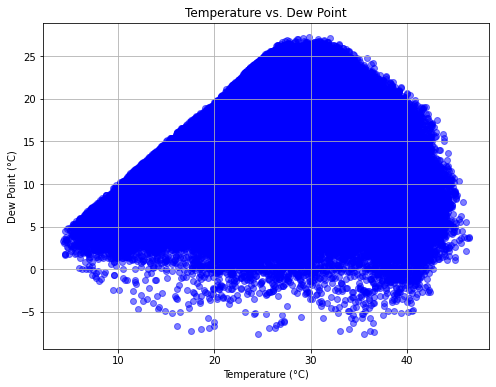

In [13]:
# Draw a scatter plot for Temperature vs. Dew Point

plt.figure(figsize=(8, 6))
plt.scatter(df_added['temperature_2m'], df_added['dew_point_2m'], color='blue', alpha=0.5)
plt.title('Temperature vs. Dew Point')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point (°C)')
plt.grid(True)
plt.show()

In [15]:
################# Rerun this cell #####################
# Resampling - downsampling: 
# Let's only leave the data for 15:00 to represent each day. 
# 15:00 usually has the highest temperature for each day. 

df_15_oclock = df_added[df_added.Hour == 15].reset_index(inplace=False, drop=True)

In [16]:
len(df_15_oclock.index)

5164

In [17]:
df_15_oclock.tail(5)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,...,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,Year,Month,Hour
5159,2024-02-16 15:00:00,19.580500,48.028310,8.2805,17.447853,0.0,0.0,0.0,0.0,1018.0,...,0.0,0.0,11.525623,25.438020,14.470333,26.927600,20.160000,2024,2,15
5160,2024-02-17 15:00:00,20.130499,54.903656,10.7805,18.850212,0.0,0.0,0.0,0.0,1013.7,...,0.0,0.0,10.440001,22.702845,360.000000,14.697369,16.560000,2024,2,15
5161,2024-02-18 15:00:00,22.830500,58.926945,14.3805,23.139624,0.0,0.0,0.0,0.0,1011.7,...,3.0,12.0,7.729527,11.620809,152.241550,163.810730,12.240000,2024,2,15
5162,2024-02-19 15:00:00,23.130499,41.898200,9.4805,21.380234,0.0,0.0,0.0,0.0,1011.7,...,0.0,100.0,11.090103,26.420174,256.865970,250.083500,18.359999,2024,2,15
5163,2024-02-20 15:00:00,24.330500,47.257515,12.3805,24.290752,0.0,0.0,0.0,0.0,1010.4,...,3.0,0.0,5.351785,9.449572,250.346080,252.255230,5.760000,2024,2,15


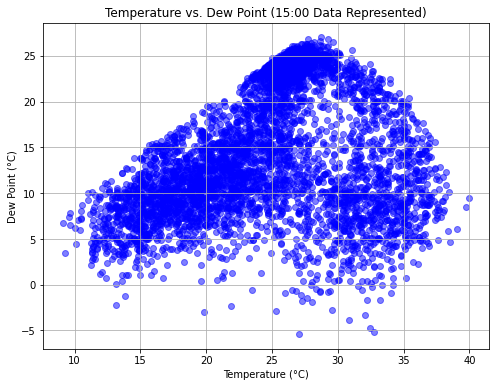

In [22]:
# Draw a scatter plot for Temperature vs. Dew Point for each day represented by 15 o'clock data

plt.figure(figsize=(8, 6))
plt.scatter(df_15_oclock['temperature_2m'], df_15_oclock['dew_point_2m'], color='blue', alpha=0.5)
plt.title('Temperature vs. Dew Point (15:00 Data Represented)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point (°C)')
plt.grid(True)
plt.show()

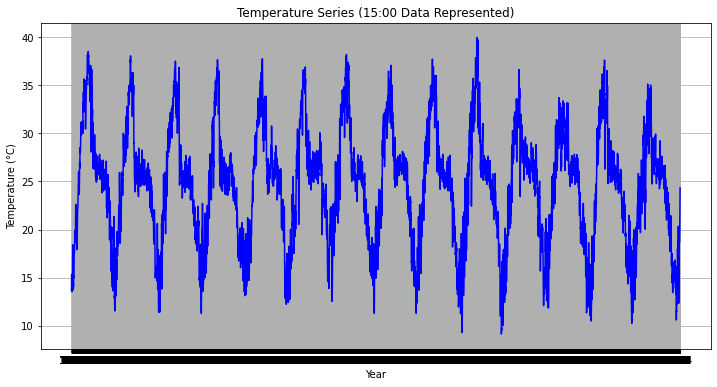

In [55]:
# Draw a plot to show the Temperature variation for the entire data, using 15 o'clock data to represent each day

plt.figure(figsize=(12, 6))
plt.plot(df_15_oclock['date'], df_15_oclock['temperature_2m'], color='blue')
plt.title('Temperature Series (15:00 Data Represented)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.grid(True)
plt.show()

Q: How is the Wind Speed changes throughout each day? 

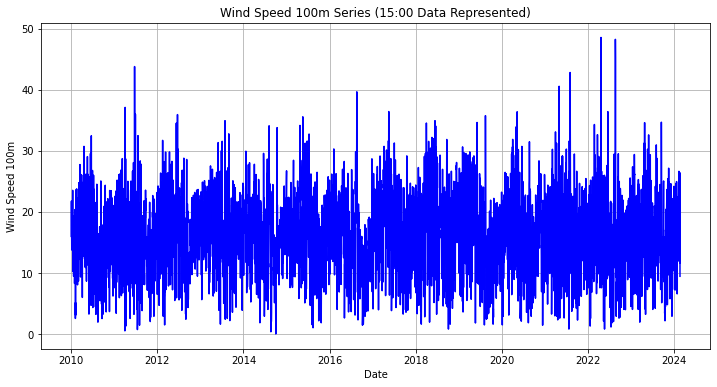

In [57]:
# Draw a plot to show the Wind Speed 100m series for the entire data, using 15 o'clock data to represent each day

plt.figure(figsize=(12, 6))
plt.plot(df_15_oclock['date'], df_15_oclock['wind_speed_100m'], color='blue')
plt.title('Wind Speed 100m Series (15:00 Data Represented)')
plt.xlabel('Date')
plt.ylabel('Wind Speed 100m')
plt.grid(True)
plt.show()

In [9]:
##################### Repeat this cell ########################
# Drop the Year 2024 data, since it is not complete: 
df_added_no2024 = df_added[df_added.Year != 2024]

In [10]:
len(df_added_no2024)

122712

In [11]:
df_added_no2024.head(5)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,...,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,Year,Month,Hour
0,2010-01-01 00:00:00,7.115500,90.498730,5.6655,4.703156,0.0,0.0,0.0,0.0,1016.7,...,0.0,0.0,9.178235,9.387651,221.82008,212.47118,12.240000,2010,1,0
1,2010-01-01 01:00:00,7.015500,90.178390,5.5155,4.572362,0.0,0.0,0.0,0.0,1017.4,...,0.0,0.0,9.164103,10.188700,224.99990,212.00534,12.599999,2010,1,1
2,2010-01-01 02:00:00,7.415500,89.277310,5.7655,5.502685,0.0,0.0,0.0,0.0,1018.1,...,0.0,0.0,5.904439,9.220499,232.43134,218.65984,12.599999,2010,1,2
3,2010-01-01 03:00:00,11.065499,82.595505,8.2155,9.856117,0.0,0.0,0.0,0.0,1019.1,...,0.0,0.0,5.091168,8.942214,224.99990,220.10085,12.959999,2010,1,3
4,2010-01-01 04:00:00,15.215500,65.385750,8.7655,14.250807,0.0,0.0,0.0,0.0,1019.8,...,0.0,0.0,4.394360,6.696387,214.99210,216.25392,12.959999,2010,1,4


In [12]:
# Output the dataframe into a file now, for our convenience to retrieve data easier later: 
df_added_no2024.to_csv("India_weather_Hatta_AddedCols_no2024.csv")

In [18]:
###################### REPEAT THIS CELL ######################

# Read the dataframe from the new file: 
df_added_no2024 = pd.read_csv("India_weather_Hatta_AddedCols_no2024.csv")

Now, we want to see how the temperature changes through months, inside of each year. We must use the average temperature for each month, to avoid inner fluctuation noises. 

In [20]:
avg_temp_yrmon_df = sqldf("""
SELECT Year, Month, AVG(temperature_2m) AS Avg_Temp
FROM df_added_no2024
GROUP BY Year, Month
""")
avg_temp_yrmon_df

,Year,Month,Avg_Temp
0,2010,1,15.994465
1,2010,2,20.924280
2,2010,3,27.946011
3,2010,4,33.444875
4,2010,5,35.944533
...,...,...,...
163,2023,8,27.236884
164,2023,9,27.307236
165,2023,10,25.448712
166,2023,11,22.001541


Year
2010    Axes(0.125,0.125;0.775x0.755)
2011    Axes(0.125,0.125;0.775x0.755)
2012    Axes(0.125,0.125;0.775x0.755)
2013    Axes(0.125,0.125;0.775x0.755)
2014    Axes(0.125,0.125;0.775x0.755)
2015    Axes(0.125,0.125;0.775x0.755)
2016    Axes(0.125,0.125;0.775x0.755)
2017    Axes(0.125,0.125;0.775x0.755)
2018    Axes(0.125,0.125;0.775x0.755)
2019    Axes(0.125,0.125;0.775x0.755)
2020    Axes(0.125,0.125;0.775x0.755)
2021    Axes(0.125,0.125;0.775x0.755)
2022    Axes(0.125,0.125;0.775x0.755)
2023    Axes(0.125,0.125;0.775x0.755)
Name: Avg_Temp, dtype: object

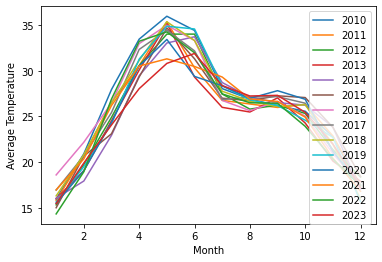

In [21]:
# Draw a line plot - avg Temperature of each month series for each year

avg_temp_yrmon_df.set_index("Month", inplace=True)
avg_temp_yrmon_df.groupby("Year")["Avg_Temp"].plot(legend=True, xlabel="Month", ylabel="Average Temperature")

We see there is indeed a clear pattern for the monthly temperature change throughout a year. The lowest temperature appears in December or January, and then temperature goes up till May to reach the peak at about 30-35°C, and then drops till July, and in August and September it bounces back higher a little bit, then it gets colder gradually. 

Q: Is there a monthly trend for the Wind Speed 100m? 

In [22]:
avg_winsp_yrmon_df = sqldf("""
SELECT Year, Month, AVG(wind_speed_100m) AS Wind_Speed_100m
FROM df_added_no2024
GROUP BY Year, Month
""")
avg_winsp_yrmon_df

,Year,Month,Wind_Speed_100m
0,2010,1,10.240657
1,2010,2,11.783798
2,2010,3,15.547893
3,2010,4,16.786193
4,2010,5,16.903866
...,...,...,...
163,2023,8,18.791827
164,2023,9,14.011468
165,2023,10,11.591720
166,2023,11,11.731518


Year
2010    Axes(0.125,0.125;0.775x0.755)
2011    Axes(0.125,0.125;0.775x0.755)
2012    Axes(0.125,0.125;0.775x0.755)
2013    Axes(0.125,0.125;0.775x0.755)
2014    Axes(0.125,0.125;0.775x0.755)
2015    Axes(0.125,0.125;0.775x0.755)
2016    Axes(0.125,0.125;0.775x0.755)
2017    Axes(0.125,0.125;0.775x0.755)
2018    Axes(0.125,0.125;0.775x0.755)
2019    Axes(0.125,0.125;0.775x0.755)
2020    Axes(0.125,0.125;0.775x0.755)
2021    Axes(0.125,0.125;0.775x0.755)
2022    Axes(0.125,0.125;0.775x0.755)
2023    Axes(0.125,0.125;0.775x0.755)
Name: Wind_Speed_100m, dtype: object

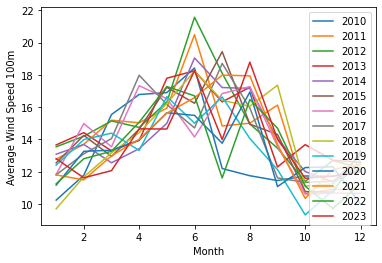

In [23]:
# Draw a line plot - avg Temperature of each month series for each year

avg_winsp_yrmon_df.set_index("Month", inplace=True)
avg_winsp_yrmon_df.groupby("Year")["Wind_Speed_100m"].plot(legend=True, xlabel="Month", ylabel="Average Wind Speed 100m")

From the graph, we can detect a rough annual trend, but it's not clear for every year. 
month

Q: Is there a clear pattern for the humidity change throughout the year (changed by month)? 

In [24]:
avg_hum_yrmon_df = sqldf("""
SELECT Year, Month, AVG(relative_humidity_2m) AS Humidity_2m
FROM df_added_no2024
GROUP BY Year, Month
""")
avg_hum_yrmon_df

,Year,Month,Humidity_2m
0,2010,1,67.556861
1,2010,2,57.104817
2,2010,3,33.148773
3,2010,4,19.933606
4,2010,5,24.045045
...,...,...,...
163,2023,8,80.549547
164,2023,9,80.423173
165,2023,10,58.095563
166,2023,11,63.232863


Year
2010    Axes(0.125,0.11;0.775x0.77)
2011    Axes(0.125,0.11;0.775x0.77)
2012    Axes(0.125,0.11;0.775x0.77)
2013    Axes(0.125,0.11;0.775x0.77)
2014    Axes(0.125,0.11;0.775x0.77)
2015    Axes(0.125,0.11;0.775x0.77)
2016    Axes(0.125,0.11;0.775x0.77)
2017    Axes(0.125,0.11;0.775x0.77)
2018    Axes(0.125,0.11;0.775x0.77)
2019    Axes(0.125,0.11;0.775x0.77)
2020    Axes(0.125,0.11;0.775x0.77)
2021    Axes(0.125,0.11;0.775x0.77)
2022    Axes(0.125,0.11;0.775x0.77)
2023    Axes(0.125,0.11;0.775x0.77)
Name: Humidity_2m, dtype: object

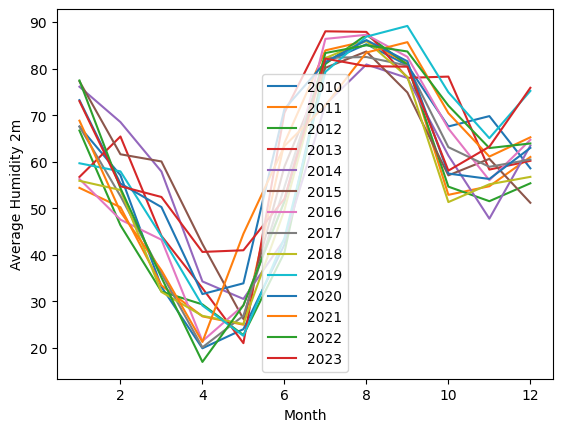

In [54]:
# Draw a line plot - avg Temperature of each month series for each year

avg_hum_yrmon_df.set_index("Month", inplace=True)
avg_hum_yrmon_df.groupby("Year")["Humidity_2m"].plot(legend=True, xlabel="Month", ylabel="Average Humidity 2m")

Q: How does Humidity affect Dew Point? 

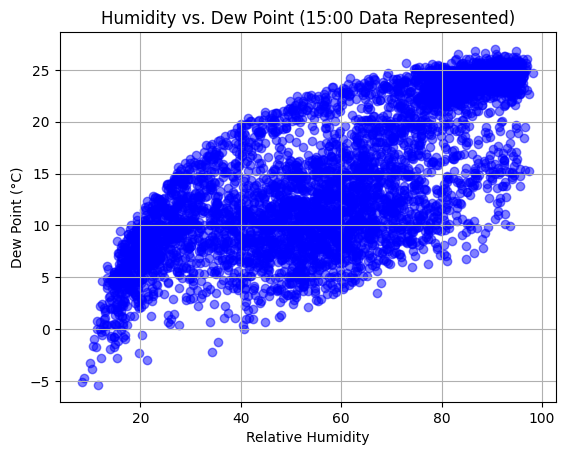

In [55]:
# Draw a scatter plot for Humidity vs. Dew Point for each day represented by 15 o'clock data

plt.scatter(df_15_oclock['relative_humidity_2m'], df_15_oclock['dew_point_2m'], color='blue', alpha=0.5)
plt.title('Humidity vs. Dew Point (15:00 Data Represented)')
plt.xlabel('Relative Humidity')
plt.ylabel('Dew Point (°C)')
plt.grid(True)
plt.show()

In [15]:
# Test the relations of several series: 
# source: https://blog.51cto.com/u_16213630/7781534

def norm_cross_corr(set1, set2):
    # python Normalized Cross Correlation function: statsmodels.tsa.stattools.ccf
    return np.sum(set1 * set2) / (np.linalg.norm(set1) * np.linalg.norm(set2))

In [21]:
temp = df_15_oclock["temperature_2m"].to_numpy()
app_temp = df_15_oclock["apparent_temperature"].to_numpy()
humidity = df_15_oclock["relative_humidity_2m"].to_numpy()
wind_sp = df_15_oclock["wind_speed_10m"].to_numpy()
wind_dir = df_15_oclock["wind_direction_100m"].to_numpy()
dew = df_15_oclock["dew_point_2m"].to_numpy()

In [22]:
print(f"Normalized Cross Correlation temp,app_temp: {norm_cross_corr(temp,app_temp)}")

Normalized Cross Correlation temp,app_temp: 0.9940852538858688


The above correlation number shows that the temperature and the apparent temperature have almost the same pattern. 

In [23]:
print(f"Normalized Cross Correlation temp,humidity: {norm_cross_corr(temp,humidity)}")

Normalized Cross Correlation temp,humidity: 0.8690066315147486


In [24]:
print(f"Normalized Cross Correlation temp,wind_sp: {norm_cross_corr(temp,wind_sp)}")

Normalized Cross Correlation temp,wind_sp: 0.9152357528758308


In [25]:
print(f"Normalized Cross Correlation temp,wind_dir: {norm_cross_corr(temp,wind_dir)}")

Normalized Cross Correlation temp,wind_dir: 0.8008950754339106


In [26]:
print(f"Normalized Cross Correlation temp,dew: {norm_cross_corr(temp,dew)}")

Normalized Cross Correlation temp,dew: 0.9026050059962883


In [ ]:
####################################################################################################################
#################### Do not need to repeat the cells above running this file for continued work ####################
####################################################################################################################

Q: What are the relationships of the Temperature, Humidity, and Apparent Temperature? How does Humidity affects us to feel the real temperature? 

Visualizing temperature

In [50]:
# draw a histogram for the temperature data
temp_15 = df_15_oclock[["date", "temperature_2m"]]
temp_15_df = df_15_oclock[["date", "temperature_2m", "Year", "Month"]]

array([[<Axes: title={'center': 'temperature_2m'}>]], dtype=object)

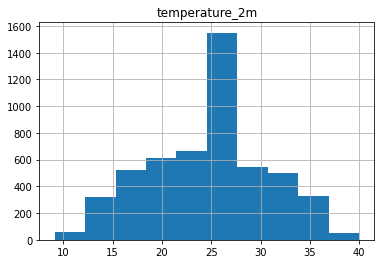

In [51]:
temp_15.hist()

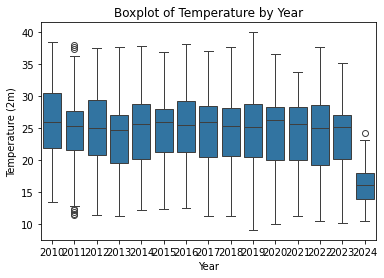

In [52]:
sns.boxplot(x='Year', y='temperature_2m', data=temp_15_df)
plt.xlabel('Year')
plt.ylabel('Temperature (2m)')
plt.title('Boxplot of Temperature by Year')
plt.show()

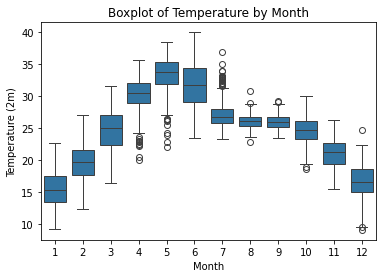

In [53]:
sns.boxplot(x='Month', y='temperature_2m', data=temp_15_df)
plt.xlabel('Month')
plt.ylabel('Temperature (2m)')
plt.title('Boxplot of Temperature by Month')
plt.show()